In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use('seaborn')

In [2]:
folder = '/Users/donquixote/Documents/Public-DSC291/hw4/runtime_scores/'

# score_arr = np.array([])
# label_arr = np.array([])
# for region in regions:
#     pickle_filename = folder+'model_all_test_{:s}_scores.pkl'.format(region)
#     with open(pickle_filename, "rb") as f: 
#         (features, label, scores, weights) = pickle.load(f)
#         label_arr = np.concatenate((label_arr, label))
#         score_arr = np.concatenate((score_arr, scores))
# scores = score_arr
# label = label_arr
scores, label = np.load(folder+'valid_pred_ensemble.npy')

# General Statistics
The output of the ensemble classifier for the validation set.  The ensemble classifier seems to have shifted the data to mostly lie between 0.2 and 1.

Text(0.5, 0, 'Datapoints')

<Figure size 576x396 with 0 Axes>

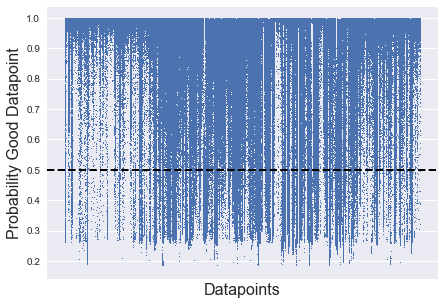

In [3]:
fig = plt.figure()
x = np.arange(len(scores))
fig = plt.figure(figsize = (7, 5))
plt.plot(x, scores, ',')
plt.axhline(0.5, color = 'k', linewidth = 2, linestyle = '--')
plt.xticks([])
plt.ylabel('Probability Good Datapoint', fontsize = 16)
plt.xlabel('Datapoints', fontsize = 16)

Text(0, 0.5, 'Log(count)')

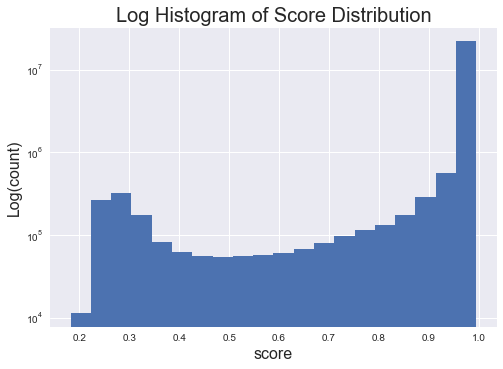

In [4]:
plt.title('Log Histogram of Score Distribution', fontsize = 20)
plt.hist(scores, bins = 20, log = True);
plt.xlabel('score', fontsize = 16)
plt.ylabel('Log(count)', fontsize = 16)

The accuracy of the classifier on the validation set

In [5]:
thresh = 0.5
print('Number of point classified good {:d}'.format(len(scores[scores > thresh])))
print('Number of point classified bad {:d}'.format(len(scores[scores < thresh])))
acc = np.sum(label == (scores > 0.5)) / label.shape[0]
print('Accuracy: {:1.2f}'.format(acc))

Number of point classified good 23781621
Number of point classified bad 1016900
Accuracy: 0.97


# Precision/Recall curve

The precision/recall curve.  Precision measures what proportion of positive identifications were actually correct i.e., measures the number of true positives (TP) divided by the sum of TP and false positives (FP); Precision = $\frac{TP}{TP+FP}$.  Recall measures the proportion of TP identified correctly i.e., Recall = $\frac{TP}{TP+FN}$.  The precision recall curve shows the tradeoff between precision and recall with an area under the curve (AUC) closer to 1 showing a better classifier.  The AUC for the ensemble classifier is 0.99.

Area under curve:  0.9914333288603986


<Figure size 576x396 with 0 Axes>

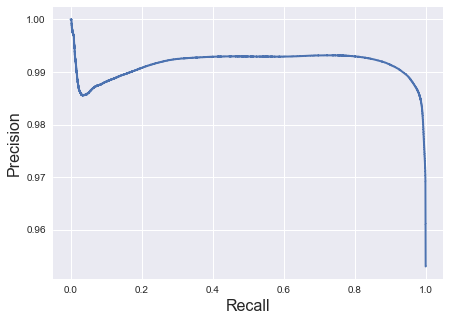

In [6]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# compute auprc
fig = plt.figure()
precision, recall, _ = precision_recall_curve(label, scores, pos_label=1)
fig = plt.figure(figsize = (7, 5))
plt.plot(recall, precision, lw = 2)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
print('Area under curve: ', auc(recall, precision))

The receiver operating characteristic (ROC) curve denotes the number of TP vs FP as the threshold for the classifier is varied.

Area under curve:  0.9141941719202098


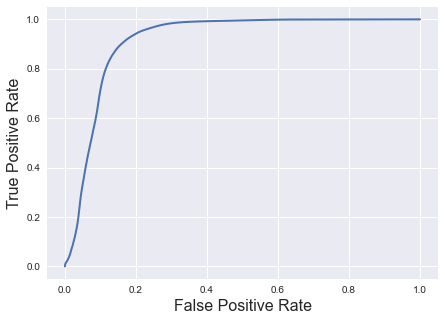

In [7]:
fig = plt.figure(figsize = (7, 5))
fpr, tpr, _ = roc_curve(label, scores, pos_label=1)
plt.plot(fpr, tpr, lw = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
print('Area under curve: ', auc(fpr, tpr))

Validation data plotted by score with blue denoting correct predictions and red denoting false predictions.  Note the distribution of true and false predictions.

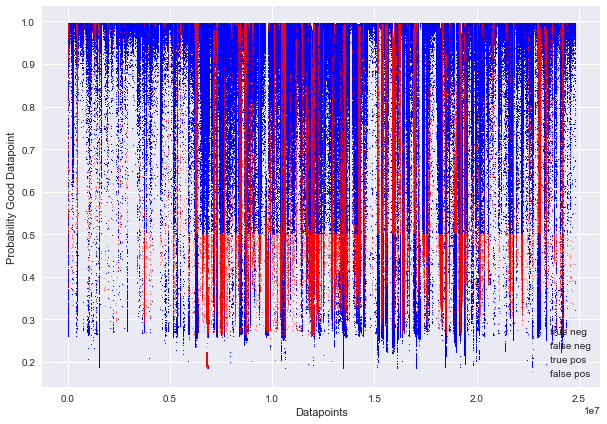

In [8]:
true_neg = np.logical_and(scores < thresh, label < thresh)
true_pos = np.logical_and(scores > thresh, label > thresh)
false_neg = np.logical_and(scores < thresh, label > thresh)
false_pos = np.logical_and(scores > thresh, label < thresh)

fig = plt.figure(figsize = (10, 7))
plt.plot(x[true_neg], scores[true_neg], 'b,', label = 'true neg')
plt.plot(x[false_neg], scores[false_neg], 'r,',alpha = 0.5, label = 'false neg') 
plt.plot(x[true_pos], scores[true_pos], 'b,', label = 'true pos') 
plt.plot(x[false_pos], scores[false_pos], 'r,',alpha = 0.5, label = 'false pos')
plt.ylabel('Probability Good Datapoint')
plt.xlabel('Datapoints')
plt.legend(loc = 'lower right')

In [9]:
print('Number of false negatives: ',  len(scores[false_neg]))
print('Number of false positives: ',len(scores[false_pos]))

Number of false negatives:  250295
Number of false positives:  398986


In [10]:
# hist_f, bins = np.histogram(scores[false_neg], bins = 1000)
# hist_t, _ = np.histogram(scores[true_neg], bins = 1000)
# bins[:-1][(hist_t/hist_f > 3)][-1]

Here we see the distribution of correctly and incorrectly predicted scores for the ensemble classifier with a threshold of 0.5.  The black dashed lines indicated the upper and lower thresholds for the optimal region for saying the classifier is not confident in its predictions.  As expected as the score approaches 1 the number of correct to incorrect increases dramatically.  The distribution on the negative is rather more interesting.  The spike in the number of incorrectly classified values around 0.2 is caused entirely by one region (JAMSTEC 2).  It is unclear why this is the case.

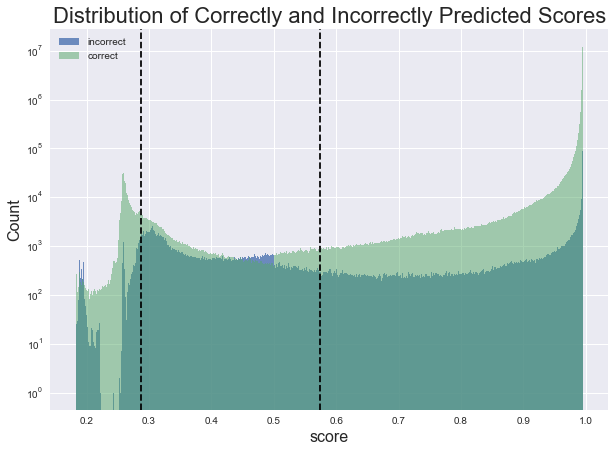

In [11]:
fig = plt.figure(figsize = (10, 7))
plt.hist(scores[false_neg | false_pos], bins = 1000, alpha = 0.8, label = 'incorrect', log = True);
plt.hist(scores[true_neg | true_pos], bins = 1000, alpha = 0.5, label = 'correct', log = True);
plt.axvline(0.28633667, ls = '--', color = 'k')
plt.axvline(0.5736, ls = '--', color = 'k')
plt.xlabel('score', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution of Correctly and Incorrectly Predicted Scores', fontsize = 22)
plt.legend();

Distribution of correct and incorrectly classified negative (<0.5) scores.  The threshold indicated is the lower threshold so all points with score greater than the threshold will be classified idk.  The threshold is chosen using an optimization routine over the cost function.

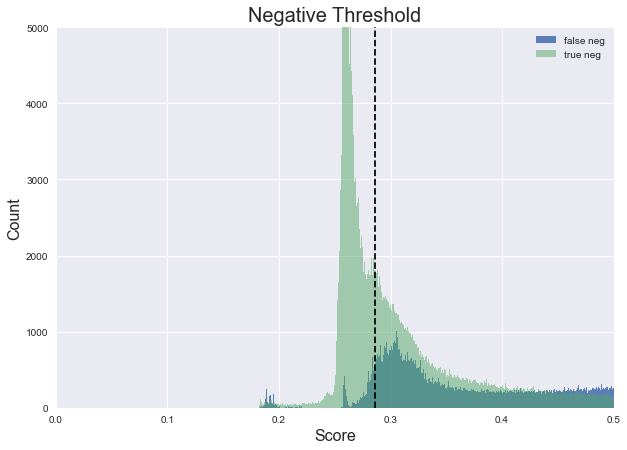

In [12]:
fig = plt.figure(figsize = (10, 7))
plt.hist(scores[false_neg], bins = 1000, alpha = 0.9, label = 'false neg')
plt.hist(scores[true_neg], bins = 1000, alpha = 0.5, label = 'true neg')
plt.xlim(0.0, 0.5)
plt.ylim(0, 5000)
plt.axvline(0.28633667, ls = '--', color = 'k')
plt.title('Negative Threshold', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Score', fontsize = 16)
plt.legend()

In [13]:
# hist_f, bins = np.histogram(scores[false_pos], bins = 1000)
# hist_t, _ = np.histogram(scores[true_pos], bins = 1000)
# bins[1:][(hist_t/hist_f > 3)][0]

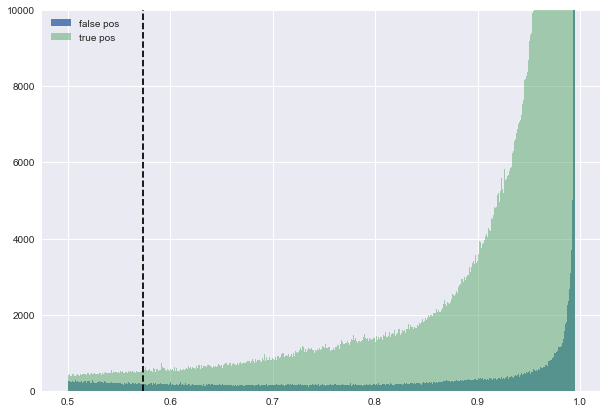

In [14]:
fig = plt.figure(figsize = (10, 7))
plt.hist(scores[false_pos], bins = 1000, alpha = 0.9, label = 'false pos')
plt.hist(scores[true_pos], bins = 1000, alpha = 0.5, label = 'true pos')
# plt.xlim(0.5, 0.7)
plt.axvline(0.5736, ls = '--', color = 'k')
plt.ylim(0, 10000)
plt.legend()

# Find Thresholds

In [15]:
scores, label = np.load(folder+'valid_pred_ensemble.npy')
def cost(x, scores, label):
    thresh_low, thresh_high = x
    true_neg = len(scores[np.logical_and(scores < thresh_low, label == 0)])
    true_pos = len(scores[np.logical_and(scores > thresh_high, label == 1)])
    false_neg = len(scores[np.logical_and(scores < thresh_low, label == 1)])
    false_pos = len(scores[np.logical_and(scores > thresh_high, label == 0)])
#     idk = len(scores[np.logical_and(scores > thresh_low, scores < thresh_high)])
    return -(true_neg+true_pos - 3*(false_neg+false_pos))

In [16]:
from scipy.optimize import minimize
res_tot = minimize(cost, [0.4, 0.7], args = (scores, label), method='nelder-mead')

In [42]:
rew_tot = -res_tot.fun/len(scores)
print('The average reward per datapoint is: ', np.round(rew_tot, 3))

The average reward per datapoint is:  0.911


In [18]:
print('the threshold values are: ', np.round(res_tot.x, 3))

the threshold values are:  [0.286 0.574]


In [19]:
valid, _ = np.load(folder+'valid_pred_ensemble.npy')

Distribution of labels when -1 = bad, 0 = idk, +1 = good set by the thresholds calculated in the optimization routine.  Notice that the number labeled bad is much lower than idk or good.  Thus the main pattern is the classifier labels good scores with high confidence but is not certain when classifying low scores.

In [20]:
valid[valid < res_tot.x[0]] = -1
valid[valid > res_tot.x[1]] = 1
valid[np.logical_and(valid < res_tot.x[1],
                     valid > res_tot.x[0])] = 0

Text(0.5, 1.0, 'Validation Set')

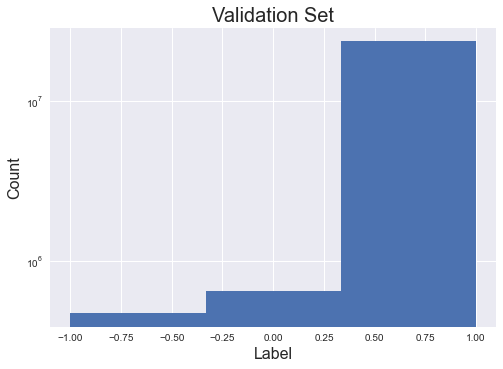

In [65]:
plt.hist(valid, bins = 3, log = True);
plt.xlabel('Label', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Validation Set', fontsize = 20)

# Region Test
In order to make sure that we have a stable classifier i.e., one that won't do too badly in any one region, we check the scores by region for the optimal threshold values for that region vs the optimal over the whole dataset.

## Global reward per region

Region 2 is the worst performer in the dataset.  Therefore if we want to do a worst cost analysis we should take region 2 into account, however region 2 (JAMSTEC 2) is also the smallest dataset so changing the thresholds to optimize its reward might dramatically reduce the global score.

In [73]:
rew_reg = []
for i in range(len(region_split)-1):
    start = region_split[i]
    end = region_split[i+1]
    rew_reg.append(-cost(res_tot.x, scores[start:end], label[start:end])/len(scores[start:end]))
np.round(rew_reg, 3)

array([0.994, 0.82 , 0.907, 0.854])

In [53]:
region_split = [0,5956658,6988540, 13238006,18093559]
thresh_arr = []
fun_arr = []
datapoints = []
for i in range(len(region_split)-1):
    start = region_split[i]
    end = region_split[i+1]
    res = minimize(cost, [0.5, 0.5], args = (scores[start:end], label[start:end]),
                   method='nelder-mead');
    datapoints.append(len(scores[start:end]))
    thresh_arr.append(res.x)
    fun_arr.append(-res.fun/len(scores[start:end]))

Optimal thresholds for each of the different regions.  Most around the same place except for region 2 which has a very low lower threshold to deal with the strange outliers it has.

In [61]:
thresh_arr

[array([0.36095352, 0.63026791]),
 array([0.16910876, 0.62278336]),
 array([0.27899159, 0.55223692]),
 array([0.37548167, 0.65148975])]

In [74]:
cost_tot = []
for i in range(len(region_split)-1):
    start = region_split[i]
    end = region_split[i+1]
    cost_tot.append(-cost(thresh_arr[i], scores, label)/len(scores))

To see the effect of setting the thresholds to each regional optimum we calculate the difference in reward/datapoint between the globally optimal result and the regional result.  As expected setting the regional thresholds globally reduces the score for the entire set.  Setting the thresholds for region 2, the one with the least accuracy, causes the largest drop in the global score. 

In [83]:
# net cost from imposing reg thresh globally
print('The net cost/score of setting each locally optimal region threshold over the whole dataset is: ', np.round(cost_tot- rew_tot, 3))

The net cost/score of setting each locally optimal region threshold over the whole dataset is:  [-0.007 -0.015 -0.001 -0.008]


To do a cost benefit analysis one should calculate the benefit to the individual region of changing its thresholds to go along with the net cost seen above

In [96]:
cost_reg_loc = []
cost_reg_opt = []
for i in range(len(region_split)-1):
    start = region_split[i]
    end = region_split[i+1]
    cost_reg_loc.append(-cost(thresh_arr[i], scores[start:end], label[start:end])/len(scores[start:end]))
    cost_reg_opt.append(-cost(res_tot.x, scores[start:end], label[start:end])/len(scores[start:end]))

In [97]:
# benefit for a region of setting thresh optimally
print(np.round(np.array(cost_reg_loc)-np.array(cost_reg_opt) , 4))

[0.0004 0.0044 0.0012 0.0164]


We see that providing optimal regional thresholds helps slightly in region 4.  I don't really see an argument for changing the thresholds but maybe someone can give me a good argument?

# Test Set

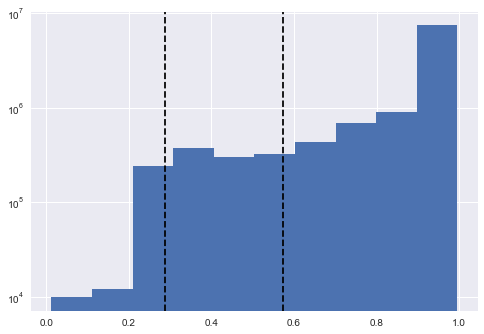

In [101]:
final_result = np.load(folder+'final_pred_ensemble.npy')
plt.hist(final_result, log = True)
plt.axvline(res_tot.x[0], ls = '--', color = 'k')
plt.axvline(res_tot.x[1], ls = '--', color = 'k')

In [102]:
final_result = np.load(folder+'final_pred_ensemble.npy')
final_result[final_result < res_tot.x[0]] = -1
final_result[final_result > res_tot.x[1]] = 1
final_result[np.logical_and(final_result < res_tot.x[1],
                            final_result > res_tot.x[0])] = 0


(array([ 114753., 1049794., 9606908.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <a list of 3 Patch objects>)

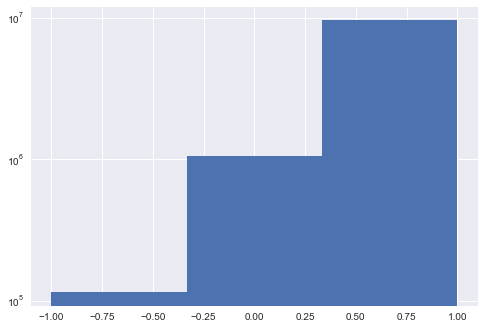

In [104]:
plt.hist(final_result,bins = 3, log = True)

In [63]:
# np.savetxt('final_predictions.txt', final_result, fmt = '%d')